In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [2]:
df_aireline = pd.read_csv("airline_passengers.csv")
df_aireline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


<AxesSubplot: >

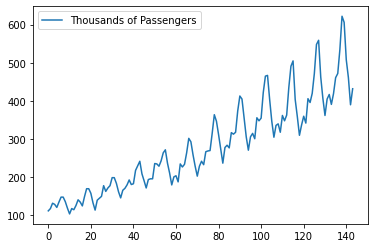

In [3]:
df_aireline.plot()

<AxesSubplot: xlabel='Thousands of Passengers'>

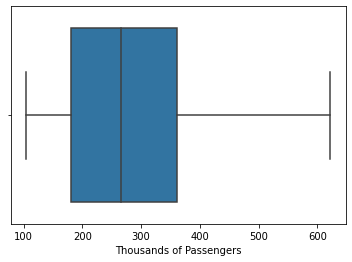

In [4]:
sns.boxplot(df_aireline['Thousands of Passengers'])

In [5]:
df_aireline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [6]:
df_aireline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [7]:
df_aireline.dropna(axis=0,inplace=True)

In [8]:
df_aireline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [9]:
df_aireline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [10]:
df_aireline['Month'] = pd.to_datetime(df_aireline['Month'])

In [11]:
df_aireline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [12]:
df_aireline.set_index('Month',inplace=True)

In [13]:
df_aireline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot: xlabel='Month'>

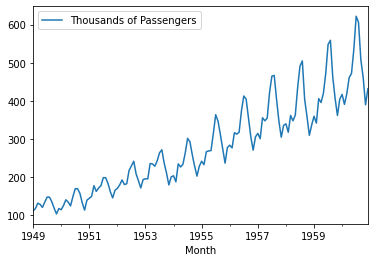

In [14]:
df_aireline.plot()

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [16]:
def adf_test(series):
    dftest = adfuller(series, autolag='AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
    if dftest[1] <= 0.05:
        print("Reject null hypothesis")
    else:
        print("Accept null hypothesis")

In [17]:
adf_test(df_aireline['Thousands of Passengers'])

1. ADF :  0.8153688792060488
2. P-Value :  0.991880243437641
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation :  130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598
Accept null hypothesis


In [18]:
## use technique called 'Differencing' to make the time series stationary

df_aireline['Passengers First Difference'] = df_aireline['Thousands of Passengers'] - df_aireline['Thousands of Passengers'].shift(1)

In [19]:
df_aireline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [20]:
adf_test(df_aireline['Passengers First Difference'].dropna())

1. ADF :  -2.8292668241700056
2. P-Value :  0.054213290283824704
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation :  130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598
Accept null hypothesis


In [21]:
df_aireline['Passengers Second Difference'] = df_aireline['Passengers First Difference'] - df_aireline['Passengers First Difference'].shift(1)

In [22]:
adf_test(df_aireline['Passengers Second Difference'].dropna())

1. ADF :  -16.384231542468548
2. P-Value :  2.732891850013967e-29
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation :  130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598
Reject null hypothesis


In [23]:
## 12 months seasonal differencing
## Seasonal Differencing
df_aireline['Seasonal First Difference'] = df_aireline['Thousands of Passengers'] - df_aireline['Thousands of Passengers'].shift(12)

In [24]:
adf_test(df_aireline['Seasonal First Difference'].dropna())

1. ADF :  -3.3830207264924805
2. P-Value :  0.011551493085514982
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation :  130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598
Reject null hypothesis


In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

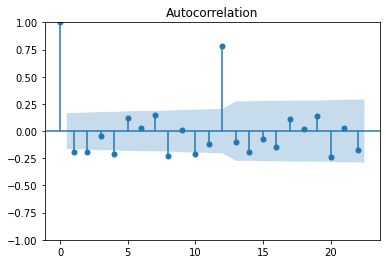

In [26]:
acf = plot_acf(df_aireline['Passengers Second Difference'].dropna())

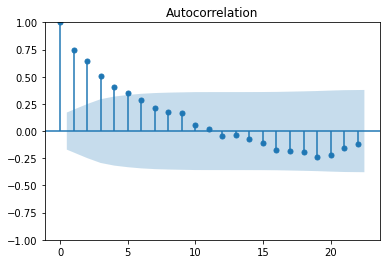

In [27]:

acf12 = plot_acf(df_aireline['Seasonal First Difference'].dropna())


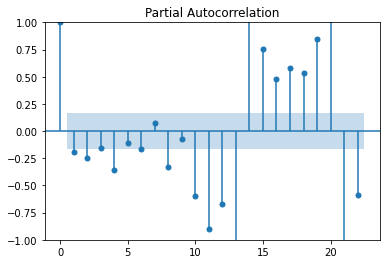

In [28]:
pacf = plot_pacf(df_aireline['Passengers Second Difference'].dropna())

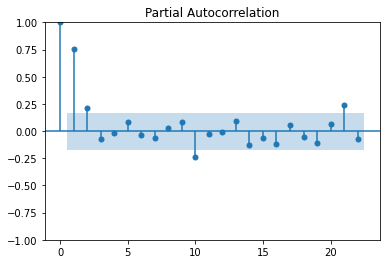

In [29]:
pacf12 = plot_pacf(df_aireline['Seasonal First Difference'].dropna())

In [30]:
df_aireline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Seasonal First Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [31]:
from datetime import datetime, timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [32]:
train_data = df_aireline[:train_dataset_end]
test_data = df_aireline[train_dataset_end+ timedelta(days=1):test_dataset_end]

In [33]:
## predict the future values
pred_start = test_data.index[0]
pred_end = test_data.index[-1]

In [34]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Seasonal First Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [35]:
## ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

In [91]:
model_arima = ARIMA(train_data['Thousands of Passengers'],order=(12,2,10))

c:\Users\utamp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\utamp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\utamp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [92]:
model_arima_fit = model_arima.fit()

model_arima_fit.summary()

c:\Users\utamp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(12, 2, 10)   Log Likelihood                -306.315
Date:                     Wed, 22 Feb 2023   AIC                            658.630
Time:                             22:50:52   BIC                            713.984
Sample:                         01-01-1949   HQIC                           680.854
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1825      0.779     -0.234      0.815      -1.709       1.344
ar.L2         -0.3002      0.585     -0.513      0.608      -1.447       0.847
ar.L3         -0.2685      0.718     -0.374      0.709      -1.676       1.139
ar.L4         -0.2060      0.593     -0.347      0.728      -1.369       0.956
ar.L5         -0.3416      0.671     -0.509      0.611      -1.657       0.974
ar.L6         -0.1490      0.640     -0.233      0.816      -1.404       1.106
ar.L7         -0.3206      0.581     -0.552      0.581      -1.459       0.818
ar.L8         -0.2901      0.611     -0.475      0.635      -1.487       0.907
ar.L9         -0.2495      0.656     -0.380      0.704      -1.536       1.037
ar.L10        -0.3007      0.547     -0.550      0.582      -1.372       0.771
ar.L11        -0.1531      0.653     -0.235      0.815      -1.433       1.126
ar.L12         0.5679      0.515      1.104      0.270      -0.441       1.576
ma.L1         -1.0034      0.933     -1.076      0.282      -2.832       0.825
ma.L2          0.1708      1.169      0.146      0.884      -2.121       2.463
ma.L3         -0.1614      1.149     -0.140      0.888      -2.414       2.091
ma.L4         -0.0080      1.077     -0.007      0.994      -2.119       2.103
ma.L5          0.3357      1.012      0.332      0.740      -1.647       2.318
ma.L6         -0.4587      0.956     -0.480      0.631      -2.333       1.416
ma.L7          0.4375      0.709      0.617      0.537      -0.953       1.828
ma.L8         -0.3530      0.478     -0.739      0.460      -1.289       0.583
ma.L9          0.3829      0.399      0.961      0.337      -0.398       1.164
ma.L10        -0.2942      0.224     -1.316      0.188      -0.733       0.144
sigma2        83.7336     25.221      3.320      0.001      34.301     133.166
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.72   Prob(JB):                         0.33
Heteroskedasticity (H):               2.10   Skew:                             0.38
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
## predict the future values

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [94]:
pred = model_arima_fit.predict(start=pred_start_date,end=pred_end_date,dynamic=False)

residuals = test_data['Thousands of Passengers'] - pred

In [95]:
residuals

Month
1956-01-01     -2.374666
1956-02-01     -3.394824
1956-03-01     16.224115
1956-04-01      4.768757
1956-05-01      7.170413
1956-06-01     21.639821
1956-07-01     14.752188
1956-08-01     30.967565
1956-09-01      8.556221
1956-10-01     -2.986535
1956-11-01     -7.204257
1956-12-01     -3.563755
1957-01-01     -7.119903
1957-02-01    -10.508498
1957-03-01     29.513758
1957-04-01     10.785714
1957-05-01     14.488735
1957-06-01     36.408528
1957-07-01     38.308860
1957-08-01     63.434146
1957-09-01     27.726519
1957-10-01      4.449629
1957-11-01    -10.798722
1957-12-01     -5.556605
1958-01-01    -15.753675
1958-02-01    -23.953252
1958-03-01      9.251162
1958-04-01    -17.445153
1958-05-01     -8.207397
1958-06-01     17.727139
1958-07-01     35.649489
1958-08-01     72.138621
1958-09-01     -1.866480
1958-10-01    -17.415264
1958-11-01    -42.573973
1958-12-01    -37.401609
1959-01-01    -28.622394
1959-02-01    -30.445061
1959-03-01     26.371115
1959-04-01      2.2

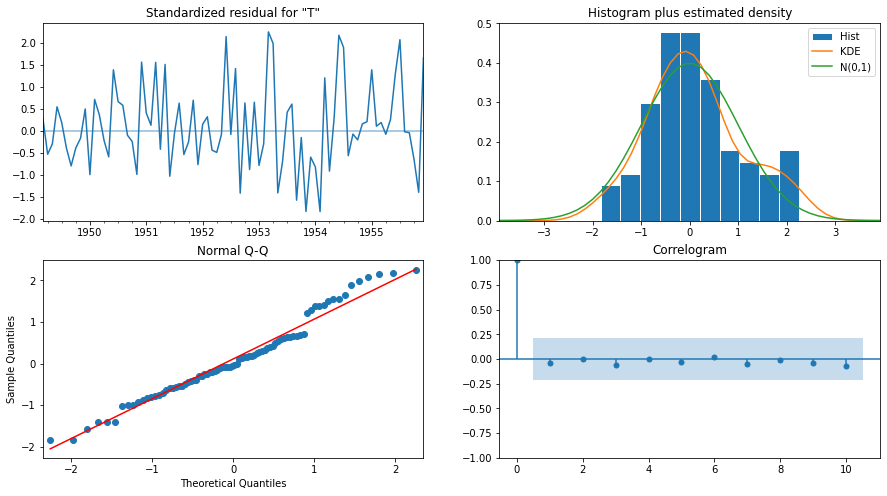

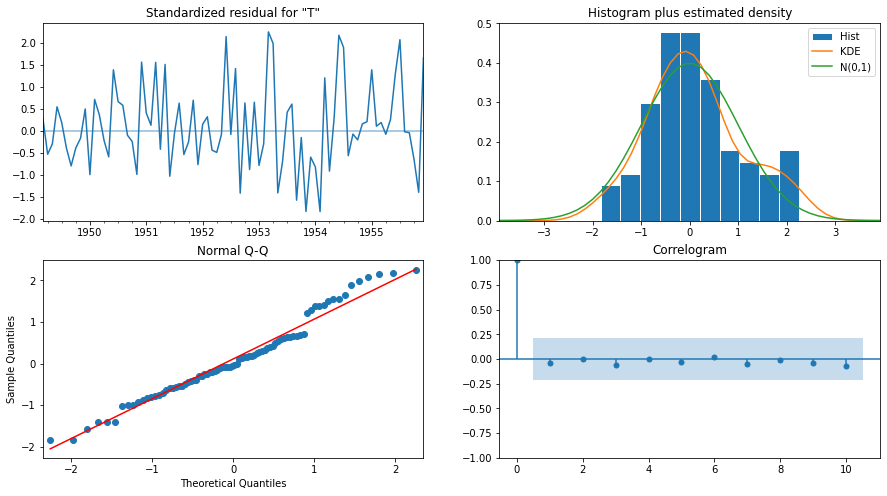

In [96]:
model_arima_fit.plot_diagnostics(figsize=(15,8))

<AxesSubplot: ylabel='Density'>

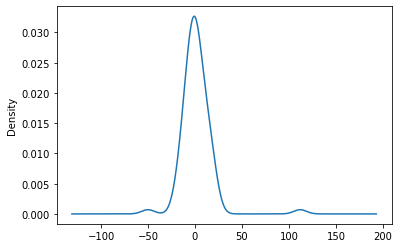

In [97]:
model_arima_fit.resid.plot(kind='kde')

In [98]:
test_data['pred ARIMA'] = pred

<AxesSubplot: xlabel='Month'>

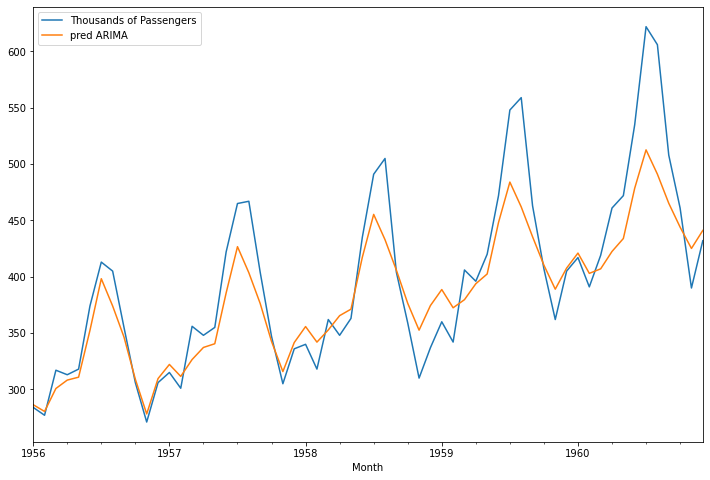

In [99]:
test_data[['Thousands of Passengers','pred ARIMA']].plot(figsize=(12,8))

In [100]:
## create SARIMAX model

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [116]:

model_sarimax = SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(1,1,1,12))

c:\Users\utamp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\utamp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [117]:
model_sarimax_fit = model_sarimax.fit()

model_sarimax_fit.summary()

c:\Users\utamp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(1, 1, [1], 12)   Log Likelihood                -263.915
Date:                              Wed, 22 Feb 2023   AIC                            549.829
Time:                                      22:53:00   BIC                            574.872
Sample:                                  01-01-1949   HQIC                           559.799
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5579      3.366      0.166      0.868      -6.039       7.154
ar.L2          0.8515      0.384      2.215      0.027       0.098       1.605
ar.L3         -0.4204      3.063     -0.137      0.891      -6.425       5.584
ma.L1          0.2017      3.279      0.062      0.951      -6.226       6.629
ma.L2         -0.5168      2.420     -0.214      0.831      -5.260       4.226
ma.L3         -0.0927      0.713     -0.130      0.897      -1.490       1.305
ma.L4         -0.1894      0.541     -0.350      0.726      -1.249       0.870
ma.L5          0.1674      0.924      0.181      0.856      -1.644       1.979
ar.S.L12      -0.3127      0.868     -0.360      0.719      -2.015       1.389
ma.S.L12       0.1057      0.955      0.111      0.912      -1.765       1.977
sigma2        84.1090     32.783      2.566      0.010      19.856     148.362
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.93   Prob(JB):                         0.39
Heteroskedasticity (H):               2.41   Skew:                             0.40
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [118]:

pred = model_sarimax_fit.predict(start=pred_start_date,end=pred_end_date,dynamic=False)

In [119]:
test_data['pred SARIMAX'] = pred

<AxesSubplot: ylabel='Density'>

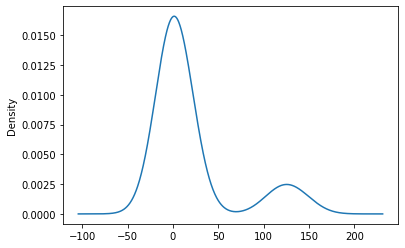

In [120]:
model_sarimax_fit.resid.plot(kind='kde')

<AxesSubplot: xlabel='Month'>

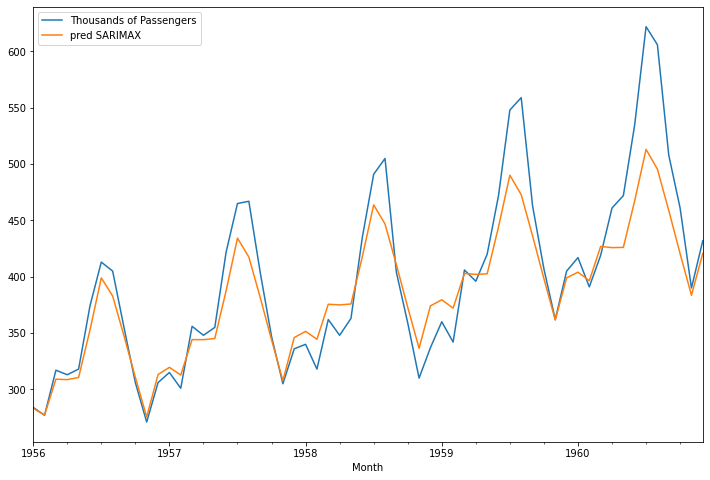

In [121]:
test_data[['Thousands of Passengers','pred SARIMAX']].plot(figsize=(12,8))

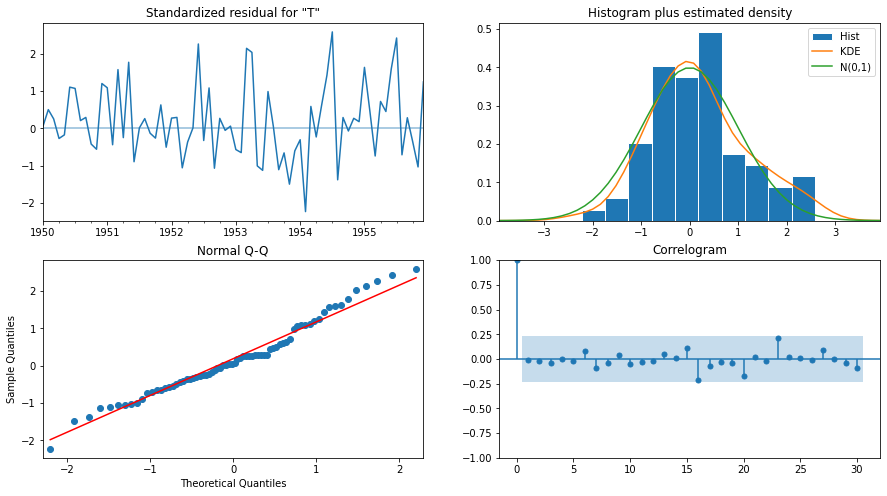

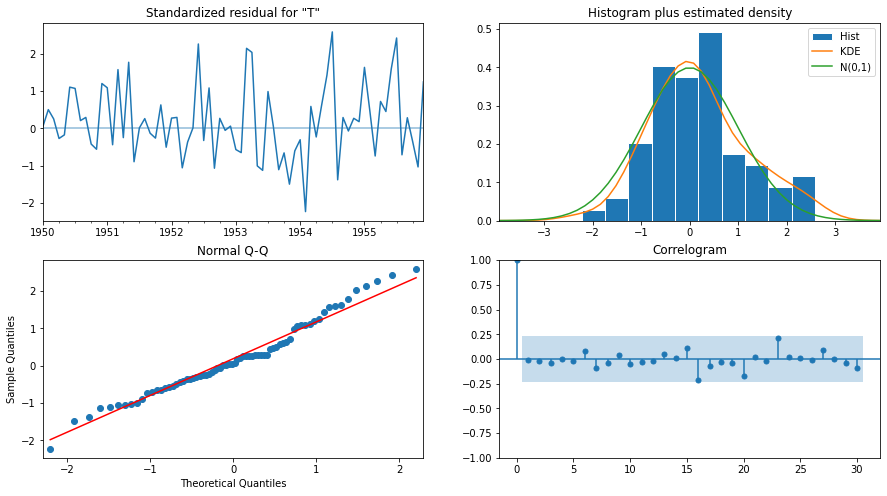

In [122]:
model_sarimax_fit.plot_diagnostics(figsize=(15,8),lags=30)

In [108]:
## create fbprophet model

from fbprophet import Prophet

df_aireline.reset_index(inplace=True)

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
df_aireline.columns = ['ds','y']

df_aireline

In [ ]:
model_fbprophet = Prophet()

model_fbprophet.fit(df_aireline)

In [ ]:

future = model_fbprophet.make_future_dataframe(periods=36,freq='MS')

In [ ]:
future

In [ ]:
forecast = model_fbprophet.predict(future)

In [ ]:
forecast

In [ ]:
model_fbprophet.plot(forecast,xlabel='Date',ylabel='Thousands of Passengers')

In [ ]:
model_fbprophet.plot_components(forecast)